# Context
* An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the
website takes certain actions based on their interest. The company plans to analyze these interests and
wants to determine whether a new feature will be effective or not. Companies often analyze users’ re-
sponses to two variants of a product to decide which of the two variants is more effective. This experimental
technique is known as a/b testing that is used to determine whether a new feature attracts users based on
a chosen metric.
* Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has
created a new landing page. You have been assigned the task to decide whether the new landing page
is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them
equally into two groups. The old landing page is served to the first group (control group) and the new
landing page is served to the second group (treatment group). Various data about the customers in both
groups are collected in ’abtest.csv’. Perform the statistical analysis to answer the following questions using
the collected data.

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Objectives:

* Explore the dataset and extract insights using Exploratory Data Analysis.

In [99]:
data = pd.read_csv("abtest.csv")
df1 = data.copy()

In [100]:
df1.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [101]:
df1.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [102]:
df1.shape

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [103]:
df1["group"] = df1["group"].astype("category")
df1["landing_page"] = df1["landing_page"].astype("category")
df1["converted"] = df1["converted"].astype("category")
df1["language_preferred"] = df1["language_preferred"].astype("category")

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [105]:
df1.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [106]:
df1.describe(include=["category"])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,new,yes,French
freq,50,50,55,34


In [107]:
df1.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [108]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


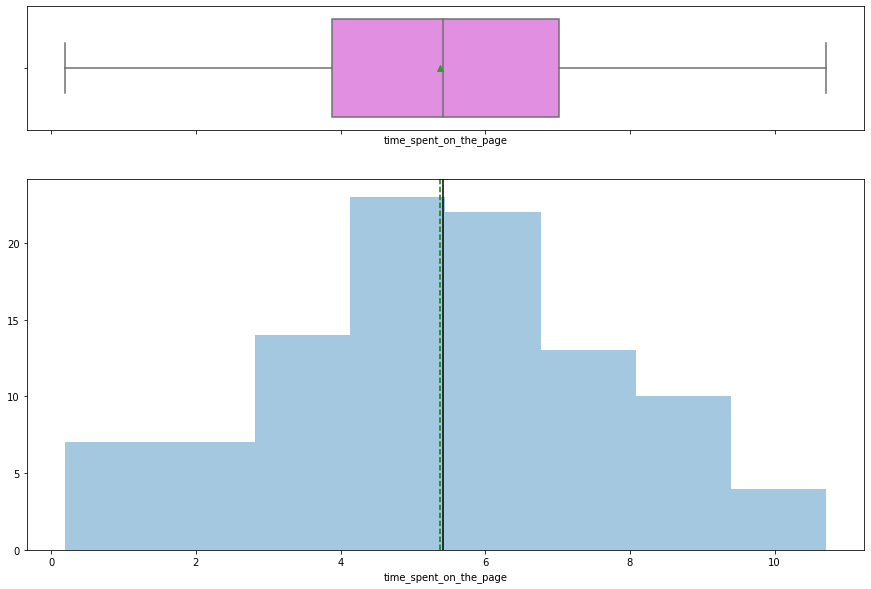

In [109]:
histogram_boxplot(df1["time_spent_on_the_page"])

In [110]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


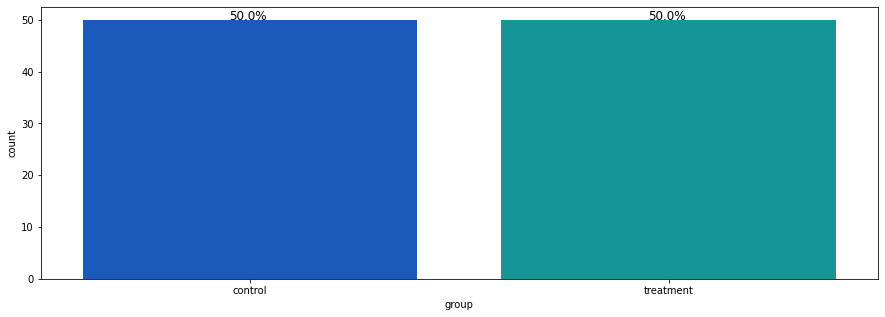

In [111]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df1["group"], palette='winter')
perc_on_bar(ax, df1["group"])

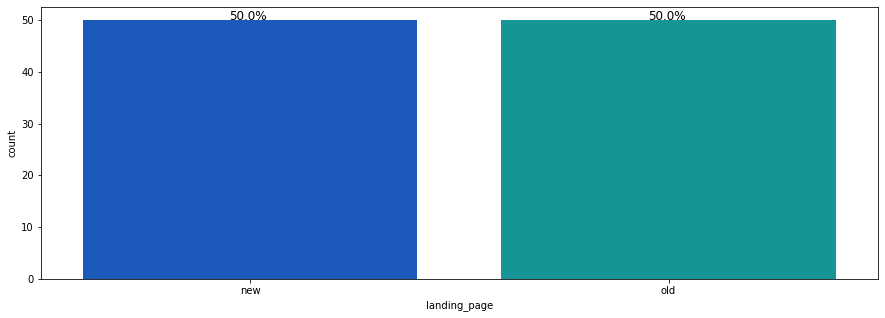

In [112]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df1["landing_page"], palette='winter')
perc_on_bar(ax, df1["landing_page"])

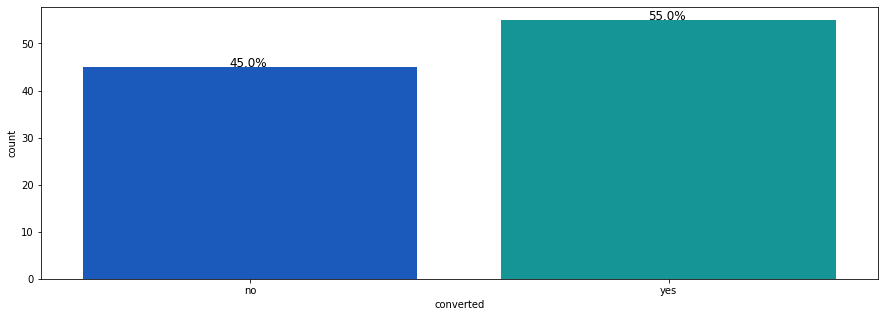

In [113]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df1["converted"], palette='winter')
perc_on_bar(ax, df1["converted"])

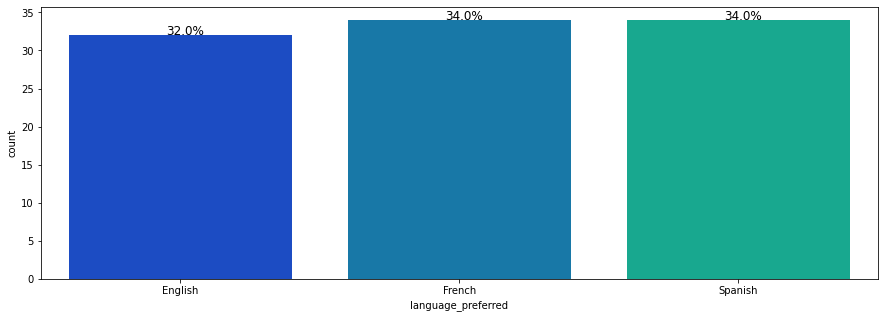

In [114]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df1["language_preferred"], palette='winter')
perc_on_bar(ax, df1["language_preferred"])

C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


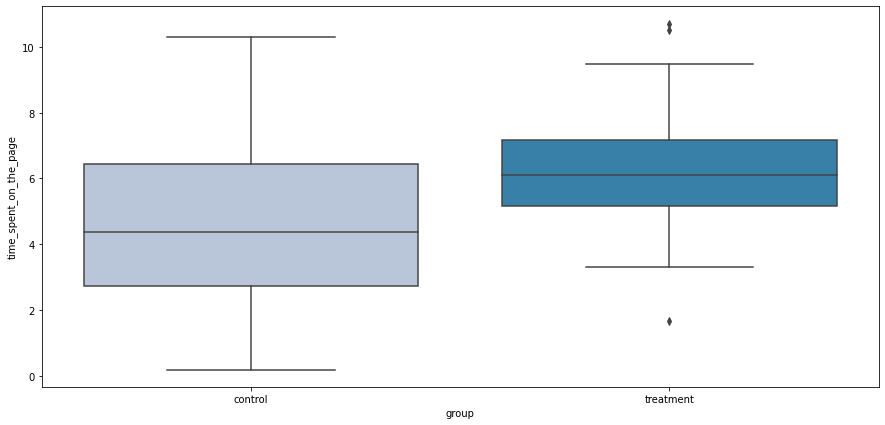

In [115]:
plt.figure(figsize=(15,7))
sns.boxplot(df1["group"], df1["time_spent_on_the_page"], palette="PuBu")
plt.show()

C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


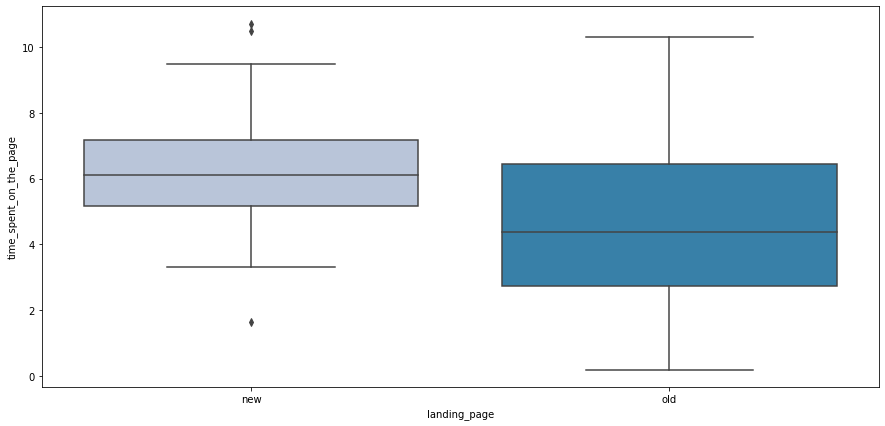

In [116]:
plt.figure(figsize=(15,7))
sns.boxplot(df1["landing_page"], df1["time_spent_on_the_page"], palette="PuBu")
plt.show()

C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


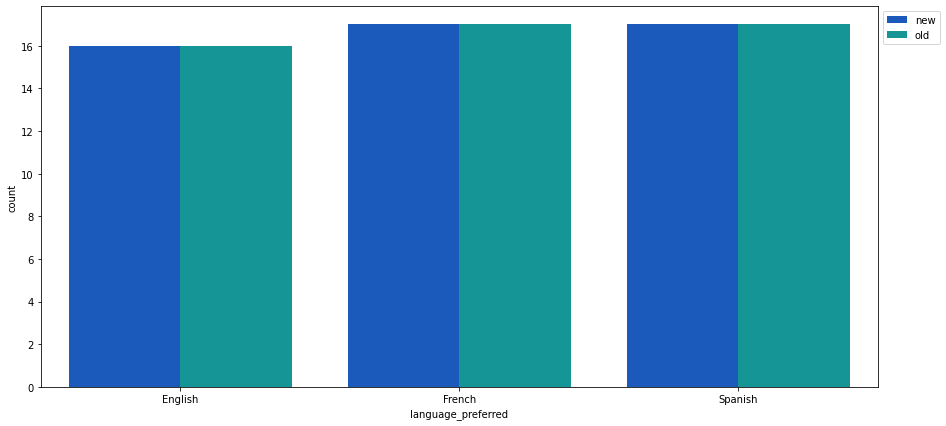

In [117]:
plt.figure(figsize=(15,7))
sns.countplot(df1["language_preferred"],hue=df1["landing_page"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

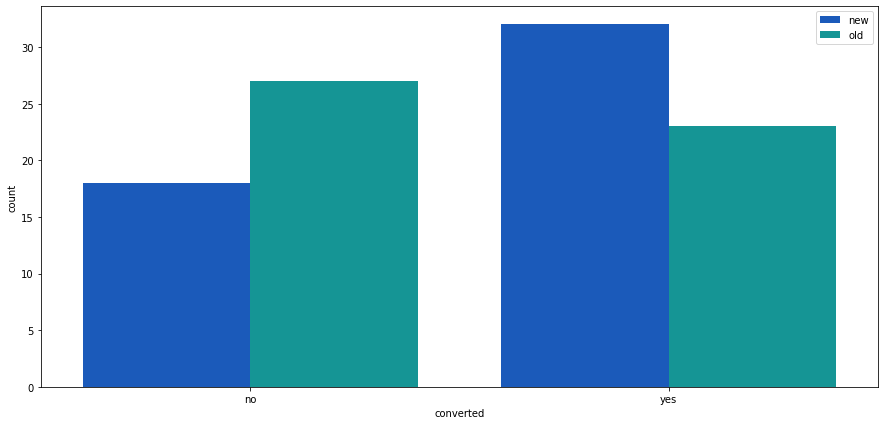

In [118]:
plt.figure(figsize=(15,7))
sns.countplot(df1["converted"],hue=df1["landing_page"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()


* Do the users spend more time on the new landing page than the old landing page?

In [119]:
landing_page_old = df1[df1["landing_page"] == "old"]
landing_page_new = df1[df1["landing_page"] == "new"]

landing_page_old.describe()


,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546566.50000,4.532400
std,17.67767,2.581975
min,546493.00000,0.190000
25%,546555.25000,2.720000
50%,546567.50000,4.380000
75%,546579.75000,6.442500
max,546592.00000,10.300000


In [120]:
landing_page_old.describe(include=["category"])

,group,landing_page,converted,language_preferred
count,50,50,50,50
unique,1,1,2,3
top,control,old,no,French
freq,50,50,27,17


In [121]:
landing_page_new.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546467.50000,6.223200
std,14.57738,1.817031
min,546443.00000,1.650000
25%,546455.25000,5.175000
50%,546467.50000,6.105000
75%,546479.75000,7.160000
max,546492.00000,10.710000


In [122]:
landing_page_new.describe(include=["category"])

,group,landing_page,converted,language_preferred
count,50,50,50,50
unique,1,1,2,3
top,treatment,new,yes,French
freq,50,50,32,17


C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


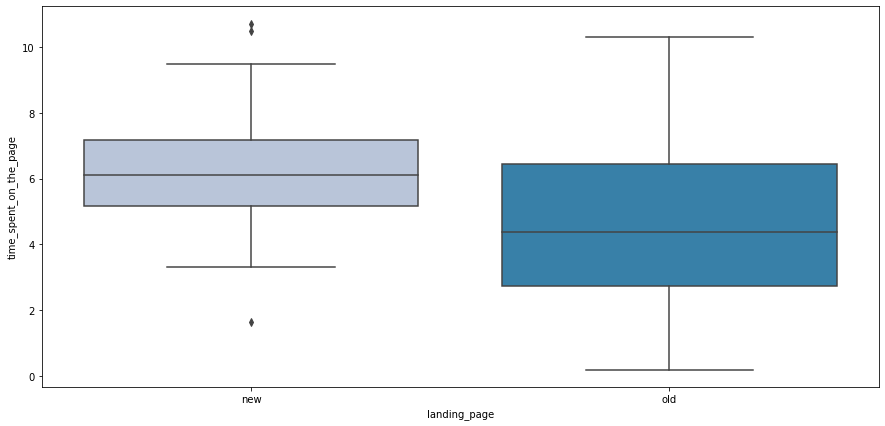

In [123]:
plt.figure(figsize=(15,7))
sns.boxplot(df1["landing_page"], df1["time_spent_on_the_page"], palette="PuBu")
plt.show()

C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


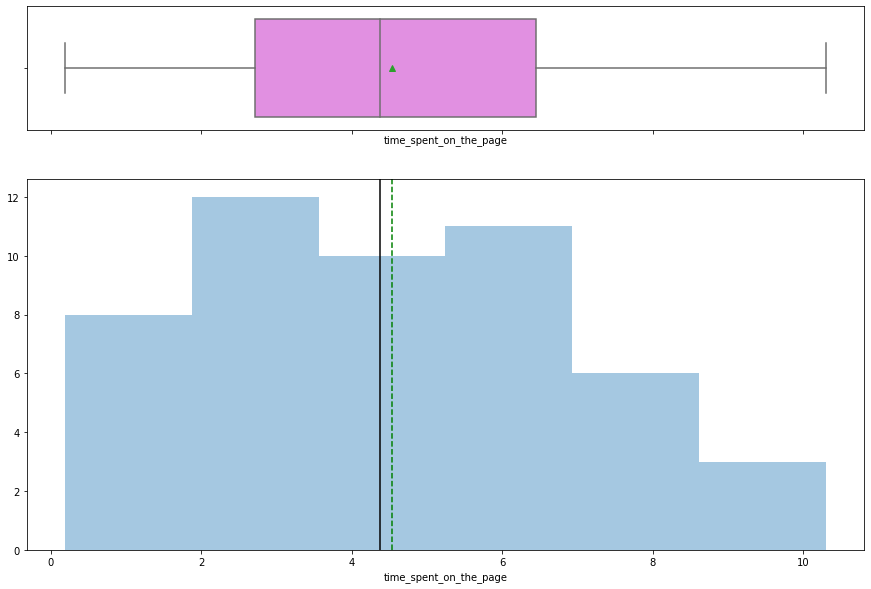

In [124]:
histogram_boxplot(landing_page_old["time_spent_on_the_page"])

C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


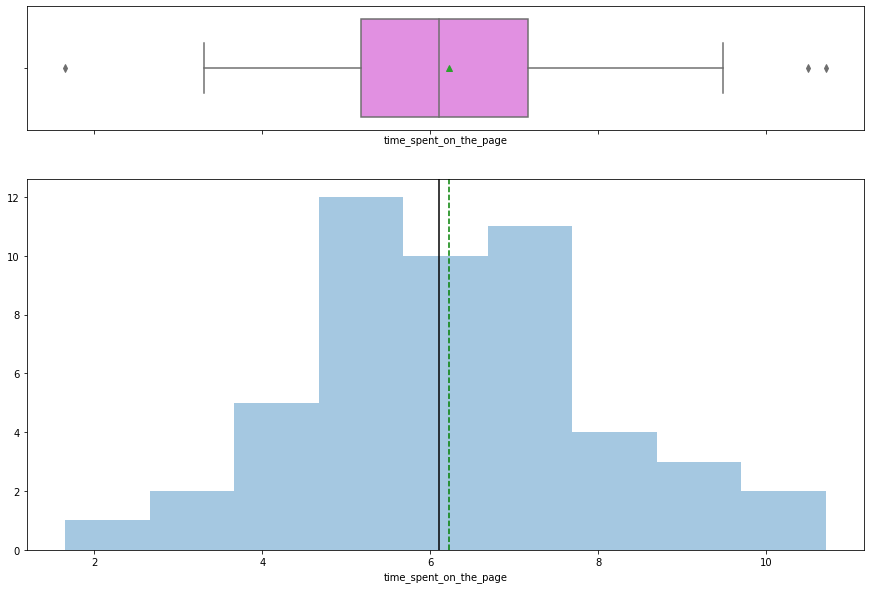

In [125]:
histogram_boxplot(landing_page_new["time_spent_on_the_page"])

From looking at the extracted data above it appears that people spend more time on the new landing pages than the old, but to prove that this information is statistically signigicant we need to perform a hypothesis test. 

#### Hypothesis Test

Ho = old landing page mean = new landing page mean
Ha = old landing page mean != new landing page mean

In [126]:
#Compute the mean of the two samples

x_bar_old = round(landing_page_old['time_spent_on_the_page'].mean(), 3)
x_bar_new = round(landing_page_new['time_spent_on_the_page'].mean(), 3)
std_old = round(landing_page_old['time_spent_on_the_page'].std(), 3)
std_new = round(landing_page_new['time_spent_on_the_page'].std(), 3)
n_old = len(landing_page_old['time_spent_on_the_page'])
n_new = len(landing_page_new['time_spent_on_the_page'])
print('The mean time spent on the old landing page is  ', x_bar_old)
print('The mean time spent on the new landing page is  ' , x_bar_new)
print('The std time spent on the old landing page is  ', std_old)
print('The std time spent on the new landing page is  ' , std_new)
print('The sample size for time spent on the old landing page is' , n_old)
print('The sample size for time spent on the new landing page is' , n_new)




The mean time spent on the old landing page is   4.532
The mean time spent on the new landing page is   6.223
The std time spent on the old landing page is   2.582
The std time spent on the new landing page is   1.817
The sample size for time spent on the old landing page is 50
The sample size for time spent on the new landing page is 50


In [127]:
from scipy.stats import norm


def ztest_2samp(x1, x2, pop_sd1, pop_sd2, n1, n2):
    
    se = np.sqrt(pop_sd1**2 / n1  + pop_sd2**2 / n2)
    test_stats = ((x1 - x2) - 0) / se
    p_value = 1 - norm.cdf(np.abs(test_stats))
    return p_value

ztest_2samp(x_bar_old, x_bar_new, std_old, std_new, n_old, n_new)


7.617265030124276e-05

* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the
new page greater than the conversion rate for the old page?

In [128]:
old = []
new = []
old_total = 0
old_yes = 0
new_total = 0
new_yes = 0


for i in range(0, 100):
    if df1['landing_page'][i] == 'old':
        new.append(df1['converted'][i])
        old_total += 1
        if(df1['converted'][i] == 'yes'):
            old_yes += 1
    else: 
        old.append(df1['converted'][i])
        new_total += 1
        if(df1['converted'][i] == 'yes'):
            new_yes += 1

old_site_conversion_rate = old_yes / old_total
new_site_conversion_rate = new_yes / new_total

print("Old Site Conversion Rate", old_site_conversion_rate)
print("New Site Conversion Rate", new_site_conversion_rate)



Old Site Conversion Rate 0.46
New Site Conversion Rate 0.64


In [129]:
old_no = old_total - old_yes
new_no = new_total - new_yes
data = {'Old/New': ['Old', 'New'], 'Converted': [old_yes, new_yes], 'Not Converted': [old_no, new_no]}

df = pd.DataFrame(data)
print(df)

  Old/New  Converted  Not Converted
0     Old         23             27
1     New         32             18


In [130]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(df.drop('Old/New', axis = 1))

print(expected)

print('The chi-square is ', chi)

print('The p-value is ', p_value)

print('The degree of freedom', dof)

[[27.5 22.5]
 [27.5 22.5]]
The chi-square is  2.5858585858585856
The p-value is  0.10782192815996855
The degree of freedom 1


* Does the converted status depend on the preferred language? [Hint: Create a contingency table
using the pandas.crosstab() function]

In [131]:
lang = np.array(df1['language_preferred'])
conversion = np.array(df1['converted'])
land_page = np.array(df1['landing_page'])

pd.crosstab(lang, [conversion, land_page])

col_0    no     yes    
col_1   new old new old
row_0                  
English   7   5   9  11
French    4  13  13   4
Spanish   7   9  10   8

* Is the mean time spent on the new page same for the different language users?

C:\Users\Willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


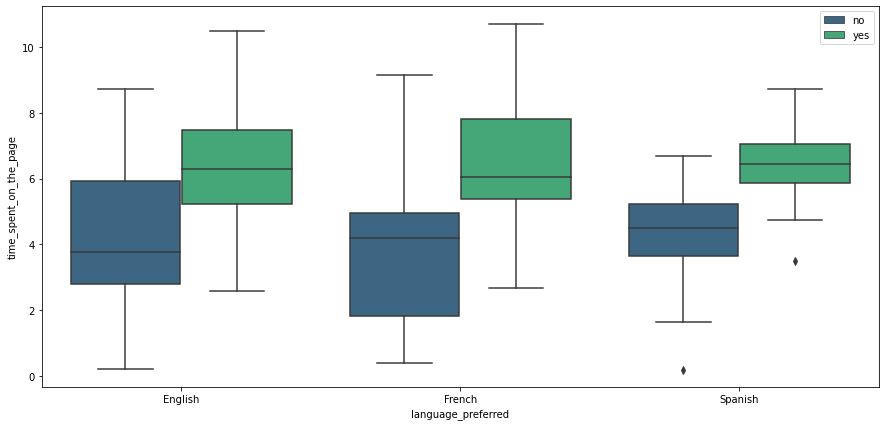

In [132]:
plt.figure(figsize=(15,7))
sns.boxplot(df1["language_preferred"],df1["time_spent_on_the_page"],hue=df1["converted"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [137]:
english = df1[df1["language_preferred"] == "Spanish"]
e_mean = df1["language_preferred"]

print(e_mean)

# print(landing_page_old)

0     Spanish
1     English
2     Spanish
3      French
4     Spanish
       ...   
95    Spanish
96    English
97    Spanish
98    Spanish
99    English
Name: language_preferred, Length: 100, dtype: category
Categories (3, object): ['English', 'French', 'Spanish']
